
 Summary Statistics for Salary:

mean      155086.001813
median    144000.000000
std        76384.320221
min        15000.000000
max       800000.000000
Name: salary_in_usd, dtype: float64


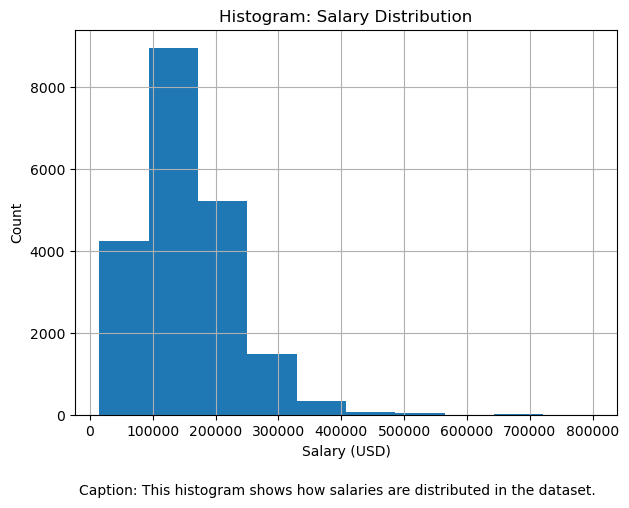

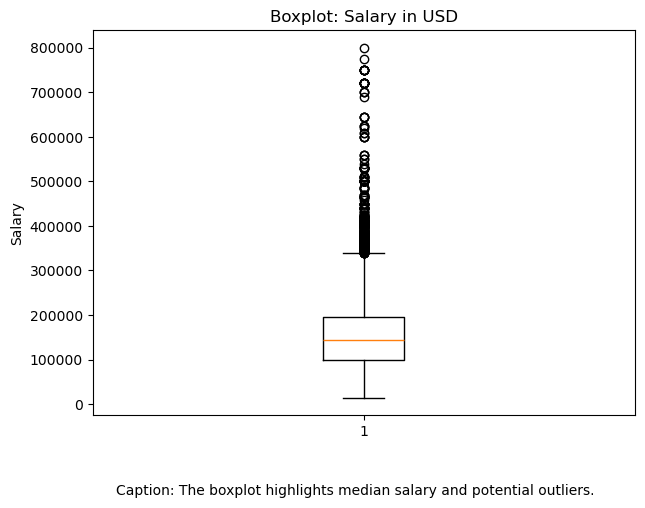

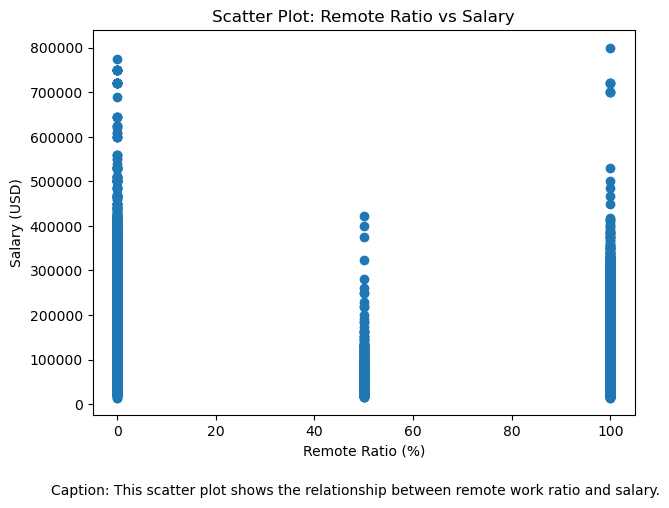


 Dataset Info After Loading:

<class 'pandas.core.frame.DataFrame'>
Index: 20407 entries, 0 to 40331
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           20407 non-null  int64 
 1   experience_level    20407 non-null  object
 2   employment_type     20407 non-null  object
 3   job_title           20407 non-null  object
 4   salary              20407 non-null  int64 
 5   salary_currency     20407 non-null  object
 6   salary_in_usd       20407 non-null  int64 
 7   employee_residence  20407 non-null  object
 8   remote_ratio        20407 non-null  int64 
 9   company_location    20407 non-null  object
 10  company_size        20407 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.9+ MB


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


#  Load Data


data = pd.read_csv("global_ai_ml_data_salaries.csv")
data.drop_duplicates(inplace=True)



#  Descriptive Analysis


#  Summary Statistics 
print("\n Summary Statistics for Salary:\n")
print(data["salary_in_usd"].agg(["mean", "median", "std", "min", "max"]))


# Histogram 
plt.figure(figsize=(7,5))
data["salary_in_usd"].hist()
plt.title("Histogram: Salary Distribution")
plt.xlabel("Salary (USD)")
plt.ylabel("Count")
plt.figtext(0.5, -0.05, 
            "Caption: This histogram shows how salaries are distributed in the dataset.",
            ha="center")
plt.show()


#  Boxplot 
plt.figure(figsize=(7,5))
plt.boxplot(data["salary_in_usd"])
plt.title("Boxplot: Salary in USD")
plt.ylabel("Salary")
plt.figtext(0.5, -0.05, 
            "Caption: The boxplot highlights median salary and potential outliers.",
            ha="center")
plt.show()


#  Scatter Plot 
plt.figure(figsize=(7,5))
plt.scatter(data["remote_ratio"], data["salary_in_usd"])
plt.title("Scatter Plot: Remote Ratio vs Salary")
plt.xlabel("Remote Ratio (%)")
plt.ylabel("Salary (USD)")
plt.figtext(
    0.5, -0.05,
    "Caption: This scatter plot shows the relationship between remote work ratio and salary.",
    ha="center"
)
plt.show()



#  Define Features & Target


target = "salary_in_usd"
X = data.drop(columns=[target])
y = data[target]



#  Define Column Types


numeric_cols = ["salary", "remote_ratio"]

ordinal_cols = ["company_size", "employment_type"]
ordinal_categories = [
    ["S", "M", "L"],
    ["CT", "FT", "PT", "FL"]
]

onehot_cols = ["job_title", "salary_currency", "employee_residence", "company_location"]

if "experience_level" in X.columns:
    onehot_cols.append("experience_level")



#  Preprocessing Pipeline


ordinal_transformer = OrdinalEncoder(categories=ordinal_categories)
onehot_transformer = OneHotEncoder(handle_unknown="ignore")
scaler = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", scaler, numeric_cols),
        ("ord", ordinal_transformer, ordinal_cols),
        ("ohe", onehot_transformer, onehot_cols)
    ],
    remainder="drop"
)

pipeline = Pipeline(steps=[("preprocessing", preprocessor)])



#  Train-Test Split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



#  Apply Preprocessing


X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)



#  Dataset Info


print("\n Dataset Info After Loading:\n")
data.info()

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Train Multiple Linear Regression Model
model = LinearRegression()
model.fit(X_train_processed, y_train)

# Predict
y_pred = model.predict(X_test_processed)

# Evaluation Metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("\n===== Multiple Linear Regression Results =====")
print(f"R² Score       : {r2:.4f}  (Higher is better)")
print(f"MSE            : {mse:.2f}")
print(f"RMSE           : {rmse:.2f}")
print(f"MAE            : {mae:.2f}")


===== Multiple Linear Regression Results =====
R² Score       : 0.1348  (Higher is better)
MSE            : 5188787507.61
RMSE           : 72033.24
MAE            : 31533.19


In [3]:

#---------------ML

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.9,
    random_state=42
)

gbr.fit(X_train_processed, y_train)
y_pred = gbr.predict(X_test_processed)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("\n===== Gradient Boosting Regression Results =====")
print(f"R² Score       : {r2:.4f}  (Higher is better)")
print(f"MSE            : {mse:.2f}")
print(f"RMSE           : {rmse:.2f}")
print(f"MAE            : {mae:.2f}")



===== Gradient Boosting Regression Results =====
R² Score       : 0.9892  (Higher is better)
MSE            : 64728125.68
RMSE           : 8045.38
MAE            : 809.81


In [4]:
# ---------------------------------------------
#  Logistic Regression Model
# ---------------------------------------------

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


#  Create Binary Target (High Salary / Low Salary)


median_salary = data["salary_in_usd"].median()

data["salary_level"] = (data["salary_in_usd"] > median_salary).astype(int)


target = "salary_level"
X = data.drop(columns=["salary_in_usd", "salary_level"])
y = data[target]




X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


#  Preprocessing + Logistic Model

logistic_model = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("logreg", LogisticRegression(max_iter=500))
    ]
)

# Train Model

logistic_model.fit(X_train, y_train)


#  Predictions

y_pred = logistic_model.predict(X_test)


#  Evaluation

print("\n Accuracy Score:")
print(accuracy_score(y_test, y_pred))

print("\n Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n Classification Report:")
print(classification_report(y_test, y_pred))



 Accuracy Score:
0.8946594806467418

 Confusion Matrix:
[[1828  225]
 [ 205 1824]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      2053
           1       0.89      0.90      0.89      2029

    accuracy                           0.89      4082
   macro avg       0.89      0.89      0.89      4082
weighted avg       0.89      0.89      0.89      4082



In [5]:
test_sample = pd.DataFrame([{
    "work_year": 2024,
    "experience_level": "SE",
    "employment_type": "FT",
    "job_title": "Data Scientist",
    "salary": 150000,                   
    "salary_currency": "USD",
    "employee_residence": "US",
    "remote_ratio": 100,
    "company_location": "US",
    "company_size": "M"
}])



# Predict
pred = logistic_model.predict(test_sample)[0]

print("\n--- Prediction Result ---")
if pred == 1:
    print("➡️ Salary Level: HIGH")
else:
    print("➡️ Salary Level: LOW")



--- Prediction Result ---
➡️ Salary Level: HIGH
